We frequently observe decline in student results on both the MI and the RI from the first to the second administration.  The purpose of this notebook is to model the conditions in which these decline happen to better understand what the typical rate would be for student decline.

In [19]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def decline_likelihood(true_improvement):
    # Hidden Values
    true_baseline = 500
    true_followup = true_baseline + true_improvement
    
    # Model
    with pm.Model() as mi_model:
        baseline = pm.Normal('baseline', true_baseline, sd=56)
        followup = pm.Normal('followup', true_followup, sd=15)
        improvement = pm.Deterministic('improvement', followup - baseline)

        trace = pm.sample(5000, step=pm.Metropolis(), progressbar=False)

    return (trace['improvement'] < 0).mean()

In [55]:
improvements = [imp for imp in range(150)]
decline_likes = [decline_likelihood(imp) for imp in range(150)]

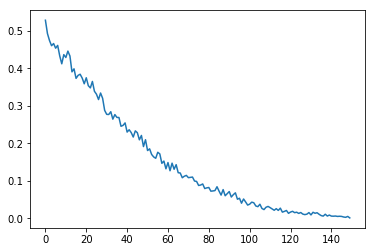

In [56]:
plt.plot(improvements, decline_likes)

I pulled the following numbers from the PSLT workbook for 6th graders.  Of those, 36% empirically declined from the first to the second assessment.  The distributions of the pre and improvements were:

* *Pre* Mean, SD = (460.16, 216.16)
* *Improvement* Mean, SD = (49.88, 173.73)

In [61]:
with pm.Model() as mi_model:
    true_baseline = pm.Normal('baseline_mean', 460.16, sd=216.16)
    true_improvement = pm.Normal('true_improvement', 49.88, sd=173.73)
    
    baseline = pm.Normal('baseline', true_baseline, sd=56)
    followup = pm.Normal('followup', baseline + true_improvement, sd=30)
    improvement = pm.Deterministic('improvement', followup - baseline)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -3.9601: 100%|████████████| 200000/200000 [00:11<00:00, 18047.97it/s]
Finished [100%]: Average ELBO = -3.9893
100%|██████████████████████████████████████████| 5000/5000 [00:20<00:00, 240.94it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002786F9A5F98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000278701E5D68>], dtype=object)

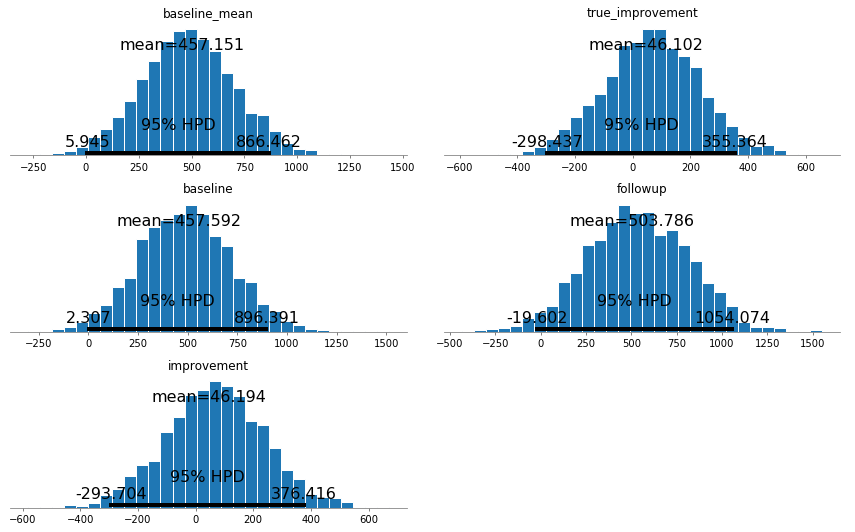

In [62]:
pm.plot_posterior(trace)

In [63]:
(trace['improvement'] < 0).mean()

0.39140000000000003